# Pré-processamento dos dados com Python

Para este hands on vamos usar mais uma vez o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic). 

Antes de aplicarmos qualquer classificador sobre este problema precisamos realizar o pré-processamento dos dados.

Este dataset já está parcialmente pré-processado, mas se quiser usar o conjunto de dados original, hospedado diretamente no Kaggle, será um desafio interessante =D.

## Dicionário de Dados

**Survived**: Sobrevivente (Não=0, Sim=1)

**Pclass**: Classe de ingresso (1=1st, 2=2nd, 3=3rd)

**Sex**: Sexo

**Age**: Idade em anos

**Sibsp**: Quantidade de irmãos e cônjuges a bordo do Titanic

**Parch**: Quantidade de pais e filhos  a bordo do Titanic

**Ticket**: Número do ticket

**Fare**: Tarifa do passageiro

**Cabin**: Número da cabine	

**Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)



### Limpeza dos Dados

- Importar as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

* Crie um dataframe com o arquivo **titanic_train.csv** ...

In [2]:
df = pd.read_csv('titanic_train.csv')

- Visualize os 5 primeiros elementos do seu data set

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Podemos usar o seaborn para criar um mapa de calor simples, heatmap, para visualizar as colunas onde faltam mais dados!

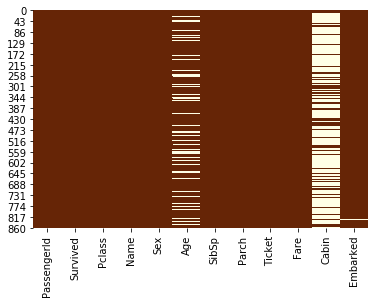

In [19]:
sns.heatmap(df.notna(), cbar=False, cmap='YlOrBr')

* Calcule o percentual de valores faltantes para cada coluna
    - Devemos eliminar a coluna "Age"? Qual a melhor forma de realizar um input para os valores faltantes?
    - E quanto a coluna "Cabin", o que devemos fazer? Será que poderíamos inferir esse valor?

In [59]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Plot o percentual de valores faltantes para cada coluna

- Como há poucas amostras sem o valor do atributo **Age** podemos realizar o input desta feature.
Qual a melhor maneira de preencher o valor da idade? Seria com a média, mediana ou com alguma função que considera algum filtro?

- Utilize a função describe e visualize o atributo **Age**. ***Dica:*** Sua decisão pode ser um filtro para recuperar a média ou mediana da idade por classe

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Para preencher a coluna **Age** você pode criar:
    - uma função que retorne um valor, e posteriormente aplicar na coluna **Age**, por exemplo **df['column'] = df[['column']].apply(function, axis=1)**.
    - ou utilizar a função fillna()

In [31]:
df.groupby(['Pclass']).median()['Age']

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

- Crie um novo mapa de calor.

* Elimine as colunas **Cabin e PassengerId** do DataSet. Por quê mesmo vamos eliminá-las?

* Construa um novo heatmap e verifique se ainda há algum valor nulo.

* Pesquise por amostras que ainda tenha valores nulos e elimine-os! ***Dica:*** df.dropna(inplace=True). 
- Verique quantos registros serão eliminados, para saber se vale a pena realizar o input dos valores.

### Criação e/ou Transformação

Precisamos converter atributos categóricos em variáveis numéricas usando pandas, a função **get_dummies** aplica o labelEncoding e OneHotEncoding!
Caso contrário, nosso algoritmo de ML não será apto para trabalhar com recursos diretamente categóricos como entradas.

### Hands on

* Veja o exemplo abaixo ou veja esta [dica!](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [67]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
train.drop(['Sex'],axis=1,inplace=True)
train = pd.concat([train,sex],axis=1)

* Refaça o mesmo processo de tratamento para **todos** os atributos categóricos (por exemplo, o atributo **Embarked**). Visualize como os seus dados estão ficando

- Você pode usar a função info() para visualizar informações do seu dataFrame

* Remova as variáveis que passaram pelo processo de one hot encoding.

* O que o código acima fez? Por quê não foram adicionadas as colunas "Female" e "C"?

- Aplique normalização sobre as tarifas. Crie a sua função ou veja esta [dica!](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)
- *P.S.: Vale a pena realizar normalização sobre todo o dataset?*

- Você pode criar uma nova feature com base na idade da pessoa, (por exemplo, criança, jovem, adulto e criança), no lugar da idade.

- Você pode substituir o nome pelos pronomes de tratamento (por exemplo, Miss., Mrs)

In [5]:
import re

def get_pronome_tratamento(name):
        pattern = re.search("\\,(.+?)\\.", name)
        found='Other'
        if pattern:
            found = pattern.group(1)
        return found

- Existe alguma informação que você pode substituir pelo ticket? Uma média de tarifa por exemplo, considerando a primeira letra do bilhete. Por quê realizar este tipo de tratamento?

* Salve o dataset tratado em um arquivo chamado 'titanic_ready_to_ml.csv'

### Desafio

- Se você deseja aplicar o mesmo pipeline de transformações sobre o dataset **titanic_test.csv** seria necessário criar um pipeline de transformações, a criação de um pipeline customizado tornaria esta tarefa mais fácil. Veja esta [dica!](https://towardsdatascience.com/custom-transformers-and-ml-data-pipelines-with-python-20ea2a7adb65)